In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import sklearn
np.set_printoptions(suppress= True) #decimal formatting

In [2]:
users_train = pd.read_csv("training_users_list.csv")
users_test = pd.read_csv("testing_users_list.csv")

Try without dummy variables to get a more simplified model

In [3]:
# feature engineering
users_train["year_last_online"] = pd.to_datetime(users_train.last_online).apply(lambda date: date.year)
# drop columns that have no value or are completely null
X_train_no_dummies = users_train.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                                      'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_train_no_dummies = X_train_no_dummies.drop(['stats_episodes'], axis=1)
# drop feature column
X_train_no_dummies = X_train_no_dummies.drop(['user_days_spent_watching'], axis=1)
# drop categorical 
X_train_no_dummies = X_train_no_dummies.drop(['gender', 'location'], axis=1)
# fill na values with their average value in the column
X_train_no_dummies = X_train_no_dummies.fillna(X_train_no_dummies.mean())


y_train_no_dummies = users_train.user_days_spent_watching

In [4]:
no_dummies_model = sm.OLS(y_train_no_dummies, X_train_no_dummies).fit()
w_no_dummies = no_dummies_model.params
print(w_no_dummies)

stats_mean_score   -4.293553
join_year          -7.770052
age                -0.189627
year_last_online    7.799645
dtype: float64


In [5]:
print(no_dummies_model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     user_days_spent_watching   R-squared (uncentered):                   0.598
Model:                                  OLS   Adj. R-squared (uncentered):              0.598
Method:                       Least Squares   F-statistic:                              5644.
Date:                      Sun, 31 Oct 2021   Prob (F-statistic):                        0.00
Time:                              21:09:16   Log-Likelihood:                         -80660.
No. Observations:                     15204   AIC:                                  1.613e+05
Df Residuals:                         15200   BIC:                                  1.614e+05
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
                       coef    std err          t      P>|t|

In [13]:
# feature engineering
users_test["year_last_online"] = pd.to_datetime(users_test.last_online).apply(lambda date: date.year)
# drop columns that have no value or 
X_test_no_dummies = users_test.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank', 
                                    'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_test_no_dummies = X_test_no_dummies.drop(['stats_episodes'], axis=1)
# drop feature column
X_test_no_dummies = X_test_no_dummies.drop(['user_days_spent_watching'], axis=1)
# drop categorical 
X_test_no_dummies = X_test_no_dummies.drop(['gender', 'location'], axis=1)
# fill na values with their average value in the column 
X_test_no_dummies = X_test_no_dummies.fillna(X_test_no_dummies.mean())

y_test_no_dummies = users_test.user_days_spent_watching

In [14]:
y_pred_no_dummies = no_dummies_model.predict(X_test_no_dummies)
print('The MSE of our simplified model is', sklearn.metrics.mean_squared_error(y_test_no_dummies, y_pred_no_dummies))

The MSE of our simplified model is 2217.039650478535


Now try creating dummy variables so we don't lose the power of our categorical variables. 

In [15]:
# feature engineering
users_train["year_last_online"] = pd.to_datetime(users_train.last_online).apply(lambda date: date.year)
# drop columns that have no value or are completely null
X_train = users_train.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                           'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_train = X_train.drop(['stats_episodes'], axis=1)
# drop feature column
X_train = X_train.drop(['user_days_spent_watching'], axis=1)
# create dummies
X_train = pd.get_dummies(X_train)
# fill na values with their average value in the column
X_train = X_train.fillna(X_train.mean())


y_train = users_train.user_days_spent_watching

In [16]:
model = sm.OLS(y_train, X_train).fit()
w = model.params
print(w)

stats_mean_score       -3.443107
join_year              -4.849010
age                     0.748037
year_last_online        8.644234
gender_Female       -7198.857877
gender_Male         -7183.345909
gender_Non-Binary   -7194.897599
location_AK          -411.190912
location_AL          -425.077086
location_AR          -423.735234
location_AZ          -424.760112
location_CA          -418.324449
location_CO          -424.874551
location_CT          -418.441841
location_DC          -409.968635
location_DE          -427.835231
location_FL          -421.549107
location_GA          -419.981071
location_HI          -413.791436
location_IA          -427.656143
location_ID          -433.212729
location_IL          -425.261435
location_IN          -424.527632
location_KS          -425.949584
location_KY          -426.030963
location_LA          -418.570349
location_MA          -426.118872
location_MD          -421.154210
location_ME          -427.071075
location_MI          -424.815248
location_M

In [17]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     user_days_spent_watching   R-squared:                       0.257
Model:                                  OLS   Adj. R-squared:                  0.254
Method:                       Least Squares   F-statistic:                     93.62
Date:                      Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                              21:09:51   Log-Likelihood:                -80187.
No. Observations:                     15204   AIC:                         1.605e+05
Df Residuals:                         15147   BIC:                         1.609e+05
Df Model:                                56                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [18]:
# feature engineering
users_test["year_last_online"] = pd.to_datetime(users_test.last_online).apply(lambda date: date.year)
# drop columns that have no value or 
X_test = users_test.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                         'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_test = X_test.drop(['stats_episodes'], axis=1)
# drop feature column
X_test = X_test.drop(['user_days_spent_watching'], axis=1)
# create dummies
X_test = pd.get_dummies(X_test)
# fill na values with their average value in the column
X_test = X_test.fillna(X_test.mean())

y_test = users_test.user_days_spent_watching

## normalized label datasets

In [12]:
mean = y_train.mean()
sigma = y_train.std()
y_train_norm = y_train.map(lambda x : (x-mean)/sigma)

y_test_norm = y_test.map(lambda x : (x-mean)/sigma)

## outliers-purged dataset

In [13]:
y_train_no_outs = y_train[y_train<y_train.quantile(0.99)]
y_train_no_outs_idx = y_train_no_outs.index
X_train_no_outs = X_train.loc[y_train_no_outs.index]

(After testing, normalizing labels and removing outlier labels didn't really improve the accuracy much, adjusted for the magnitude of the labels)

## SKLEARN LIN REG 

In [14]:
lin_reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)
lin_reg.coef_

array([-3.44310675e+00, -4.84899390e+00,  7.48033438e-01,  8.64421470e+00,
        1.40608843e+11,  1.40608843e+11,  1.40608843e+11,  6.23402465e+09,
        6.23402463e+09,  6.23402463e+09,  6.23402463e+09,  6.23402464e+09,
        6.23402463e+09,  6.23402464e+09,  6.23402465e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402464e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402462e+09,  6.23402463e+09,  6.23402463e+09,  6.23402463e+09,
        6.23402463e+09,  6.23402464e+09,  6.23402463e+09,  6.23402464e+09,
        6.23402463e+09,  6.23402463e+09,  6.23402463e+09,  6.23402463e+09,
        6.23402463e+09,  6.23402463e+09,  6.23402464e+09,  6.23402464e+09,
        6.23402464e+09,  6.23402463e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402464e+09,  6.23402463e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402463e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402464e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402463e+09,  

In [15]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, lin_reg.predict(X_test)))


training error
2230.99789343167
testing error
2079.5815892663686


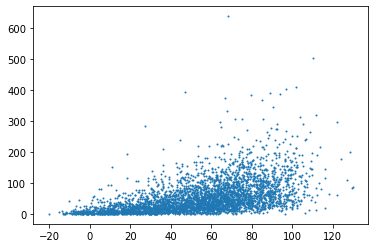

In [16]:
plt.scatter(lin_reg.predict(X_test), y_test, s = 1)

## First attempt at correction: ridge regression

In [17]:
cv_ridge = sklearn.model_selection.RandomizedSearchCV(Ridge(), {'alpha' : list(np.arange(0.01, 1000, 0.1))}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 1000, random_state = 0)

In [18]:
cv_ridge_res = cv_ridge.fit(X_train, y_train)

In [19]:
cv_ridge_res.cv_results_['params'] ##see what got tested

[{'alpha': 939.4100000000001},
 {'alpha': 89.81000000000002},
 {'alpha': 239.81},
 {'alpha': 590.61},
 {'alpha': 234.31},
 {'alpha': 822.51},
 {'alpha': 550.61},
 {'alpha': 645.11},
 {'alpha': 267.01},
 {'alpha': 349.71000000000004},
 {'alpha': 108.71000000000001},
 {'alpha': 181.91},
 {'alpha': 230.81},
 {'alpha': 608.41},
 {'alpha': 372.41},
 {'alpha': 318.41},
 {'alpha': 638.71},
 {'alpha': 372.81},
 {'alpha': 270.21},
 {'alpha': 788.3100000000001},
 {'alpha': 293.01},
 {'alpha': 598.8100000000001},
 {'alpha': 489.01},
 {'alpha': 671.8100000000001},
 {'alpha': 542.3100000000001},
 {'alpha': 321.31},
 {'alpha': 301.71},
 {'alpha': 38.21},
 {'alpha': 423.71000000000004},
 {'alpha': 472.11},
 {'alpha': 954.71},
 {'alpha': 947.71},
 {'alpha': 479.51},
 {'alpha': 474.71000000000004},
 {'alpha': 936.61},
 {'alpha': 533.41},
 {'alpha': 665.21},
 {'alpha': 903.21},
 {'alpha': 58.01},
 {'alpha': 949.11},
 {'alpha': 652.61},
 {'alpha': 434.61},
 {'alpha': 497.41},
 {'alpha': 791.3100000000001

In [20]:
alpha_ridge= cv_ridge_res.best_params_['alpha']
alpha_ridge 

465.91

In [21]:
ridge_reg = Ridge(fit_intercept = True, alpha = alpha_ridge ).fit(X_train, y_train)
ridge_reg.coef_

array([-3.40698826, -4.79272568,  0.75623694,  8.6269745 , -7.00184133,
        7.51287514, -0.51103381,  0.98344092, -0.54062229, -0.12939547,
       -0.82336942,  3.88791751, -0.70643857,  1.03586178,  0.85446071,
       -0.46631085,  0.90254311,  1.38709078,  1.94848113, -0.85297327,
       -1.25438205, -1.24655278, -0.5394346 , -0.66189659, -0.89418544,
        1.16191804, -1.3231062 ,  0.65199649, -0.48842022, -0.95843293,
       -1.4225323 , -0.33516553, -0.17370666, -0.02780636,  0.35367338,
        0.17528123,  0.61672174, -0.81098293,  0.51204157, -0.51507957,
        1.17574822,  2.42984498, -2.90044929, -0.7251126 ,  0.54248959,
       -1.19267042,  0.06404895, -0.47985945,  0.13028607,  0.5500104 ,
        1.57293486, -0.00920094, -0.51845435,  0.80947811,  0.20556116,
       -0.67662845, -0.89755612, -0.38110507])

In [22]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, ridge_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, ridge_reg.predict(X_test)))

training error
2235.5943807088047
testing error
2073.1758817861532


In [23]:
sklearn.metrics.r2_score(y_train, ridge_reg.predict(X_train))

0.25560015230968014

## lasso regression

In [45]:
cv_lasso = sklearn.model_selection.RandomizedSearchCV(Lasso(), {'alpha' : np.arange(0.001, 10, 0.1)}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 1000, random_state = 0)

In [46]:
cv_lasso_res = cv_lasso.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 100 is smaller than n_iter=1000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5784.273769747466, tolerance: 3729.7450584281946
  model = cd_fast.enet_coordinate_descent(


In [47]:
cv_lasso_res.cv_results_['params'] ##see what got tested
alpha_lasso= cv_lasso_res.best_params_['alpha']
alpha_lasso

0.101

In [48]:
lasso_reg = Lasso(fit_intercept = True, alpha = alpha_lasso).fit(X_train, y_train)
lasso_reg.coef_

array([-3.39625351, -4.82915924,  0.73515195,  8.64192976, -3.62226777,
       11.44632628, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  3.99423501, -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  2.07891614, -2.5355234 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.95794911, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ])

In [49]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, lasso_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, lasso_reg.predict(X_test)))

training error
2237.990907803315
testing error
2074.0493798330212


In [50]:
sklearn.metrics.r2_score(y_train, lasso_reg.predict(X_train))

0.2548021656894178

## random forest

In [35]:
cv_rf = sklearn.model_selection.RandomizedSearchCV(RandomForestRegressor(random_state = 0), 
                                                      {'n_estimators' : range(1,50), 'max_depth' : range(1,10)}, 
                                                      scoring = 'neg_mean_squared_error',
                                                n_iter = 100, random_state = 0)

In [36]:
cv_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=100,
                   param_distributions={'max_depth': range(1, 10),
                                        'n_estimators': range(1, 50)},
                   random_state=0, scoring='neg_mean_squared_error')

In [37]:
cv_rf.cv_results_['params'] ##see what got tested
n_est = cv_rf.best_params_['n_estimators']
max_depth = cv_rf.best_params_['max_depth']
n_est, max_depth

(40, 6)

In [38]:
rf = RandomForestRegressor(n_estimators = n_est, max_depth = max_depth).fit(X_train, y_train)
rf.feature_importances_

array([0.1045714 , 0.15377479, 0.06999942, 0.56750926, 0.02225646,
       0.03584593, 0.0003023 , 0.00075645, 0.00085727, 0.00012807,
       0.00068548, 0.00163098, 0.00126121, 0.00030905, 0.00017379,
       0.        , 0.00008587, 0.00104131, 0.00124512, 0.00003142,
       0.        , 0.0015155 , 0.00035801, 0.00264949, 0.00025689,
       0.00160847, 0.00128481, 0.00641549, 0.        , 0.00133099,
       0.00003831, 0.00026539, 0.00011628, 0.        , 0.00042796,
       0.        , 0.00239766, 0.00009542, 0.00069758, 0.00036851,
       0.00141462, 0.00159258, 0.00104722, 0.00040149, 0.00212902,
       0.00058866, 0.00014509, 0.00023443, 0.        , 0.00621404,
       0.00001878, 0.00052251, 0.00047902, 0.00049834, 0.00129802,
       0.00112382, 0.        , 0.        ])

In [39]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, rf.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, rf.predict(X_test)))

training error
1986.3430819765163
testing error
1962.445676770424


In [40]:
sklearn.metrics.r2_score(y_train, rf.predict(X_train))

0.3385949166613882

In [41]:
sklearn.metrics.r2_score(y_test, rf.predict(X_test))

0.29721301810424794

In [62]:
feature_names_good = list(X_train.columns)

feature_names_good[0] = "average rating"
feature_names_good[1] = "join year"
feature_names_good[2] = "age"
feature_names_good[3] = "year last online"
feature_names_good[4] = "gender (female)"
feature_names_good[5] = "gender (male)"



In [52]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    top = fi_df.head(6)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=top['feature_importance'], y=top['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

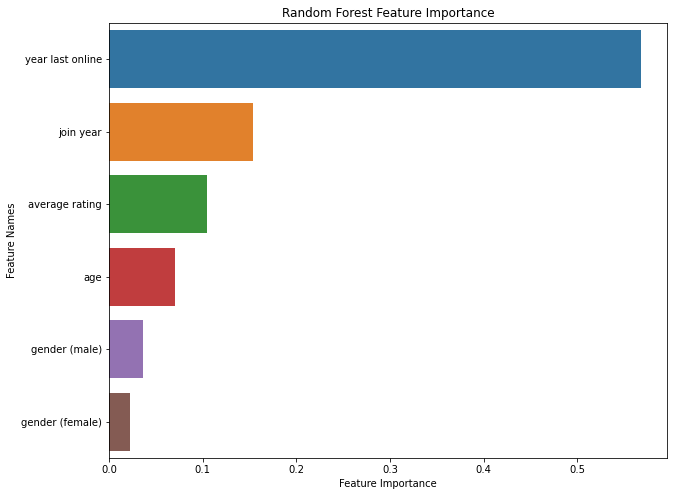

In [65]:
plot_feature_importance(rf.feature_importances_,feature_names_good,'Random Forest')

## gradient boosting

In [36]:
cv_gb = sklearn.model_selection.RandomizedSearchCV(GradientBoostingRegressor(random_state = 0), 
                                                      {'n_estimators' : range(1,15), 'max_depth' : range(1,10), 
                                                      'learning_rate' : [0.01, 0.1, 0.5, 1, 2, 3, 5, 10]}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 10, random_state = 0)

In [93]:
cv_gb.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1, 2,
                                                          3, 5, 10],
                                        'max_depth': range(1, 10),
                                        'n_estimators': range(1, 15)},
                   random_state=0, scoring='neg_mean_squared_error')

In [94]:
cv_gb.cv_results_['params'] ##see what got tested
n_est = cv_gb.best_params_['n_estimators']
max_depth = cv_gb.best_params_['max_depth']
learning_rate = cv_gb.best_params_['learning_rate']
n_est, max_depth, learning_rate

(11, 5, 0.1)

In [95]:
gb = GradientBoostingRegressor(n_estimators = n_est, max_depth = max_depth, 
                               learning_rate = learning_rate).fit(X_train, y_train)
gb.feature_importances_

array([0.        , 0.09600979, 0.14087486, 0.0680542 , 0.62012131,
       0.01534293, 0.04645373, 0.        , 0.00024919, 0.        ,
       0.        , 0.        , 0.00127752, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00246975,
       0.        , 0.        , 0.        , 0.00136649, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00104096, 0.        , 0.        ,
       0.00129384, 0.        , 0.00222566, 0.        , 0.        ,
       0.        , 0.00021358, 0.00013377, 0.00003494, 0.        ,
       0.00283748, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [96]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, gb.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, gb.predict(X_test)))

training error
2165.7681706191606
testing error
2048.566358048403


In [97]:
sklearn.metrics.r2_score(y_train, gb.predict(X_train))

0.2788506223430872

# Data Viz

In [30]:
all_labels = pd.concat([y_test, y_train]) #get labels from across the entire dataset

In [31]:
all_labels.describe()

count    19005.000000
mean        53.673187
std         54.417874
min          0.500694
25%         15.981944
50%         37.698611
75%         73.590972
max        681.177975
Name: user_days_spent_watching, dtype: float64

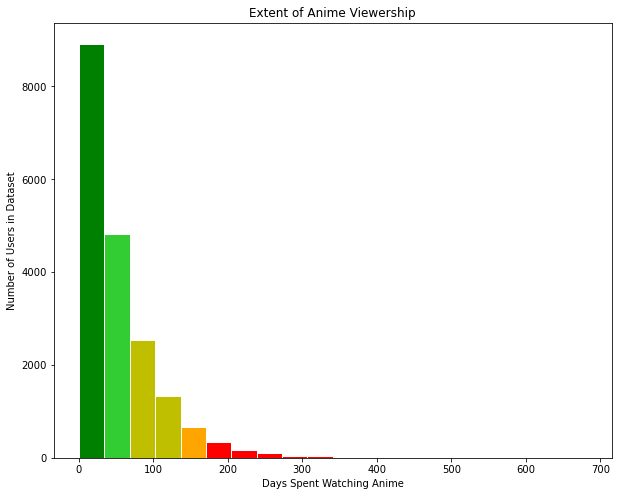

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
N, bins, patches = ax.hist(all_labels, bins=20, edgecolor='white', linewidth=1)

for i in range(0,1):
    patches[i].set_facecolor('g')
for i in range(1,2):    
    patches[i].set_facecolor('limegreen')
for i in range(2,4):    
    patches[i].set_facecolor('y')
for i in range(4,5):    
    patches[i].set_facecolor('orange')
for i in range(5, len(patches)):
    patches[i].set_facecolor('r')

plt.xlabel("Days Spent Watching Anime")
plt.ylabel("Number of Users in Dataset")
plt.title("Extent of Anime Viewership")
plt.show()

# viewing datasets

In [12]:
X_train

,stats_mean_score,join_year,age,year_last_online,gender_Female,gender_Male,gender_Non-Binary,location_AK,location_AL,location_AR,...,location_SD,location_TN,location_TX,location_UT,location_VA,location_VT,location_WA,location_WI,location_WV,location_WY
0,9.63,2007,36.491074,2010,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.96,2012,23.524258,2015,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.04,2013,29.939218,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.18,2012,28.170518,2017,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.61,2009,31.308181,2012,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,7.28,2014,23.417479,2018,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15200,8.34,2008,29.969335,2008,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15201,9.24,2014,24.586573,2017,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15202,7.99,2009,29.153433,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train

0         13.873611
1         28.088194
2         94.853472
3        133.731250
4         39.926389
            ...    
15199     78.025694
15200     20.117361
15201     11.783333
15202     37.973611
15203     51.304167
Name: user_days_spent_watching, Length: 15204, dtype: float64

In [14]:
X_test

,stats_mean_score,join_year,age,year_last_online,gender_Female,gender_Male,gender_Non-Binary,location_AK,location_AL,location_AR,...,location_SD,location_TN,location_TX,location_UT,location_VA,location_VT,location_WA,location_WI,location_WV,location_WY
0,8.25,2011,29.164385,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.61,2016,38.758077,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.89,2009,32.466324,2018,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,7.42,2009,34.878436,2015,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,7.10,2014,22.029351,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,7.83,2008,45.006023,2011,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3797,6.86,2008,31.105574,2011,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3798,7.27,2008,32.898916,2015,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3799,8.57,2012,27.658526,2015,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_test

0       154.670833
1       132.303588
2       157.660069
3        21.170139
4        46.742361
           ...    
3796     32.678472
3797    103.576389
3798    163.629167
3799     10.145833
3800     67.791667
Name: user_days_spent_watching, Length: 3801, dtype: float64

### good mapping of Lasso weights 

In [51]:
pd.Series(lasso_reg.coef_, index = X_train.columns)

stats_mean_score     -3.396254
join_year            -4.829159
age                   0.735152
year_last_online      8.641930
gender_Female        -3.622268
gender_Male          11.446326
gender_Non-Binary    -0.000000
location_AK           0.000000
location_AL          -0.000000
location_AR          -0.000000
location_AZ          -0.000000
location_CA           3.994235
location_CO          -0.000000
location_CT           0.000000
location_DC           0.000000
location_DE          -0.000000
location_FL           0.000000
location_GA           0.000000
location_HI           0.000000
location_IA          -0.000000
location_ID          -0.000000
location_IL          -0.000000
location_IN          -0.000000
location_KS          -0.000000
location_KY          -0.000000
location_LA           0.000000
location_MA          -0.000000
location_MD           0.000000
location_ME          -0.000000
location_MI          -0.000000
location_MN          -0.000000
location_MO          -0.000000
location